In [2]:
import os
import PIL as Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adamax
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir = 'cat/'

folds = os.listdir(train_data_dir)

filepaths = []
labels = []

# Loop untuk setiap folder dan file di dalamnya
for fold in folds:
    fold_path = os.path.join(train_data_dir, fold)
    
    # Mengambil file yang ada dalam folder
    if os.path.isdir(fold_path):
        for filename in os.listdir(fold_path):
            file_path = os.path.join(fold_path, filename)
            filepaths.append(file_path)
            labels.append(fold)

# Membuat DataFrame dari filepaths dan labels
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

df


,filepaths,labels
0,cat/Maine Coon\46448387_30064.jpg,Maine Coon
1,cat/Maine Coon\46450124_29900.jpg,Maine Coon
2,cat/Maine Coon\46459729_28842.jpg,Maine Coon
3,cat/Maine Coon\46463715_28449.jpg,Maine Coon
4,cat/Maine Coon\46468296_27966.jpg,Maine Coon
...,...,...
195,cat/Turkish Angora\25719155_1901.jpg,Turkish Angora
196,cat/Turkish Angora\25767737_1895.jpg,Turkish Angora
197,cat/Turkish Angora\25778269_1892.jpg,Turkish Angora
198,cat/Turkish Angora\7844895_3525.jpg,Turkish Angora


## Visualization

In [22]:
count =df['labels'].value_counts()
count

labels
Maine Coon        100
Turkish Angora    100
Name: count, dtype: int64

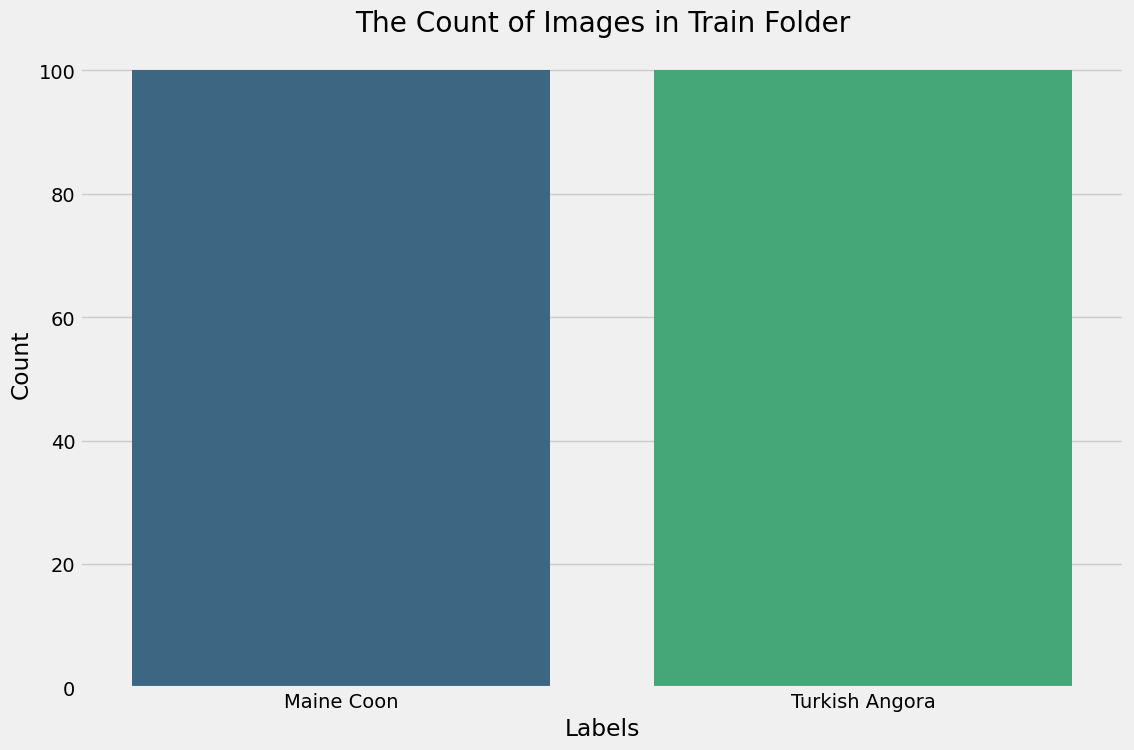

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x=count.index, y=count.values, palette='viridis', hue=count.index, legend=False)

plt.title('The Count of Images in Train Folder')
plt.xlabel('Labels')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

In [24]:
train_df , dummy_df=train_test_split(df,test_size=0.2,shuffle=True,random_state=42)
valid_df,test_df=train_test_split(df,test_size=0.4,shuffle=True,random_state=42)

In [25]:
train_df

,filepaths,labels
79,cat/Maine Coon\46647159_4638.jpg,Maine Coon
197,cat/Turkish Angora\25778269_1892.jpg,Turkish Angora
38,cat/Maine Coon\46555746_18088.jpg,Maine Coon
24,cat/Maine Coon\46513438_23039.jpg,Maine Coon
122,cat/Turkish Angora\22950072_2258.jpg,Turkish Angora
...,...,...
106,cat/Turkish Angora\22129270_2346.jpg,Turkish Angora
14,cat/Maine Coon\46494898_25189.jpg,Maine Coon
92,cat/Maine Coon\46678244_121.jpg,Maine Coon
179,cat/Turkish Angora\25162517_1967.jpg,Turkish Angora


In [26]:
test_df

,filepaths,labels
95,cat/Maine Coon\46685210_103.jpg,Maine Coon
15,cat/Maine Coon\46495795_25050.jpg,Maine Coon
30,cat/Maine Coon\46531982_20915.jpg,Maine Coon
158,cat/Turkish Angora\24298914_2084.jpg,Turkish Angora
128,cat/Turkish Angora\23043894_2243.jpg,Turkish Angora
...,...,...
113,cat/Turkish Angora\22557245_2303.jpg,Turkish Angora
26,cat/Maine Coon\46518881_22265.jpg,Maine Coon
139,cat/Turkish Angora\23249389_2210.jpg,Turkish Angora
100,cat/Turkish Angora\21988680_2364.jpg,Turkish Angora


In [9]:
valid_df

,filepaths,labels
2,cat/Maine Coon\46459729_28842.jpg,Maine Coon
77,cat/Maine Coon\46646784_4738.jpg,Maine Coon
46,cat/Maine Coon\46561653_17328.jpg,Maine Coon
187,cat/Turkish Angora\25428190_1934.jpg,Turkish Angora
191,cat/Turkish Angora\25570065_1912.jpg,Turkish Angora
...,...,...
106,cat/Turkish Angora\22129270_2346.jpg,Turkish Angora
14,cat/Maine Coon\46494898_25189.jpg,Maine Coon
92,cat/Maine Coon\46678244_121.jpg,Maine Coon
179,cat/Turkish Angora\25162517_1967.jpg,Turkish Angora


In [ ]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Membuat ImageDataGenerator untuk training dan testing
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
# tr_gen = ImageDataGenerator(
#     rescale=1./255,  # Normalisasi gambar
#     rotation_range=20,  # Rotasi acak gambar
#     width_shift_range=0.2,  # Geser gambar secara horizontal
#     height_shift_range=0.2,  # Geser gambar secara vertikal
#     shear_range=0.2,  # Shear transformasi
#     zoom_range=0.2,  # Zoom acak pada gambar
#     horizontal_flip=True,  # Flip gambar secara horizontal
#     fill_mode='nearest'  # Mengisi piksel kosong setelah transformasi
# )

train_gen = tr_gen.flow_from_dataframe(
    dataframe=train_df, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=True, 
    batch_size=batch_size
)

valid_gen = ts_gen.flow_from_dataframe(
    dataframe=valid_df, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=True, 
    batch_size=batch_size
)

test_gen = ts_gen.flow_from_dataframe(
    dataframe=test_df, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=False,
    batch_size=batch_size
)

Found 160 validated image filenames belonging to 2 classes.
Found 120 validated image filenames belonging to 2 classes.
Found 80 validated image filenames belonging to 2 classes.


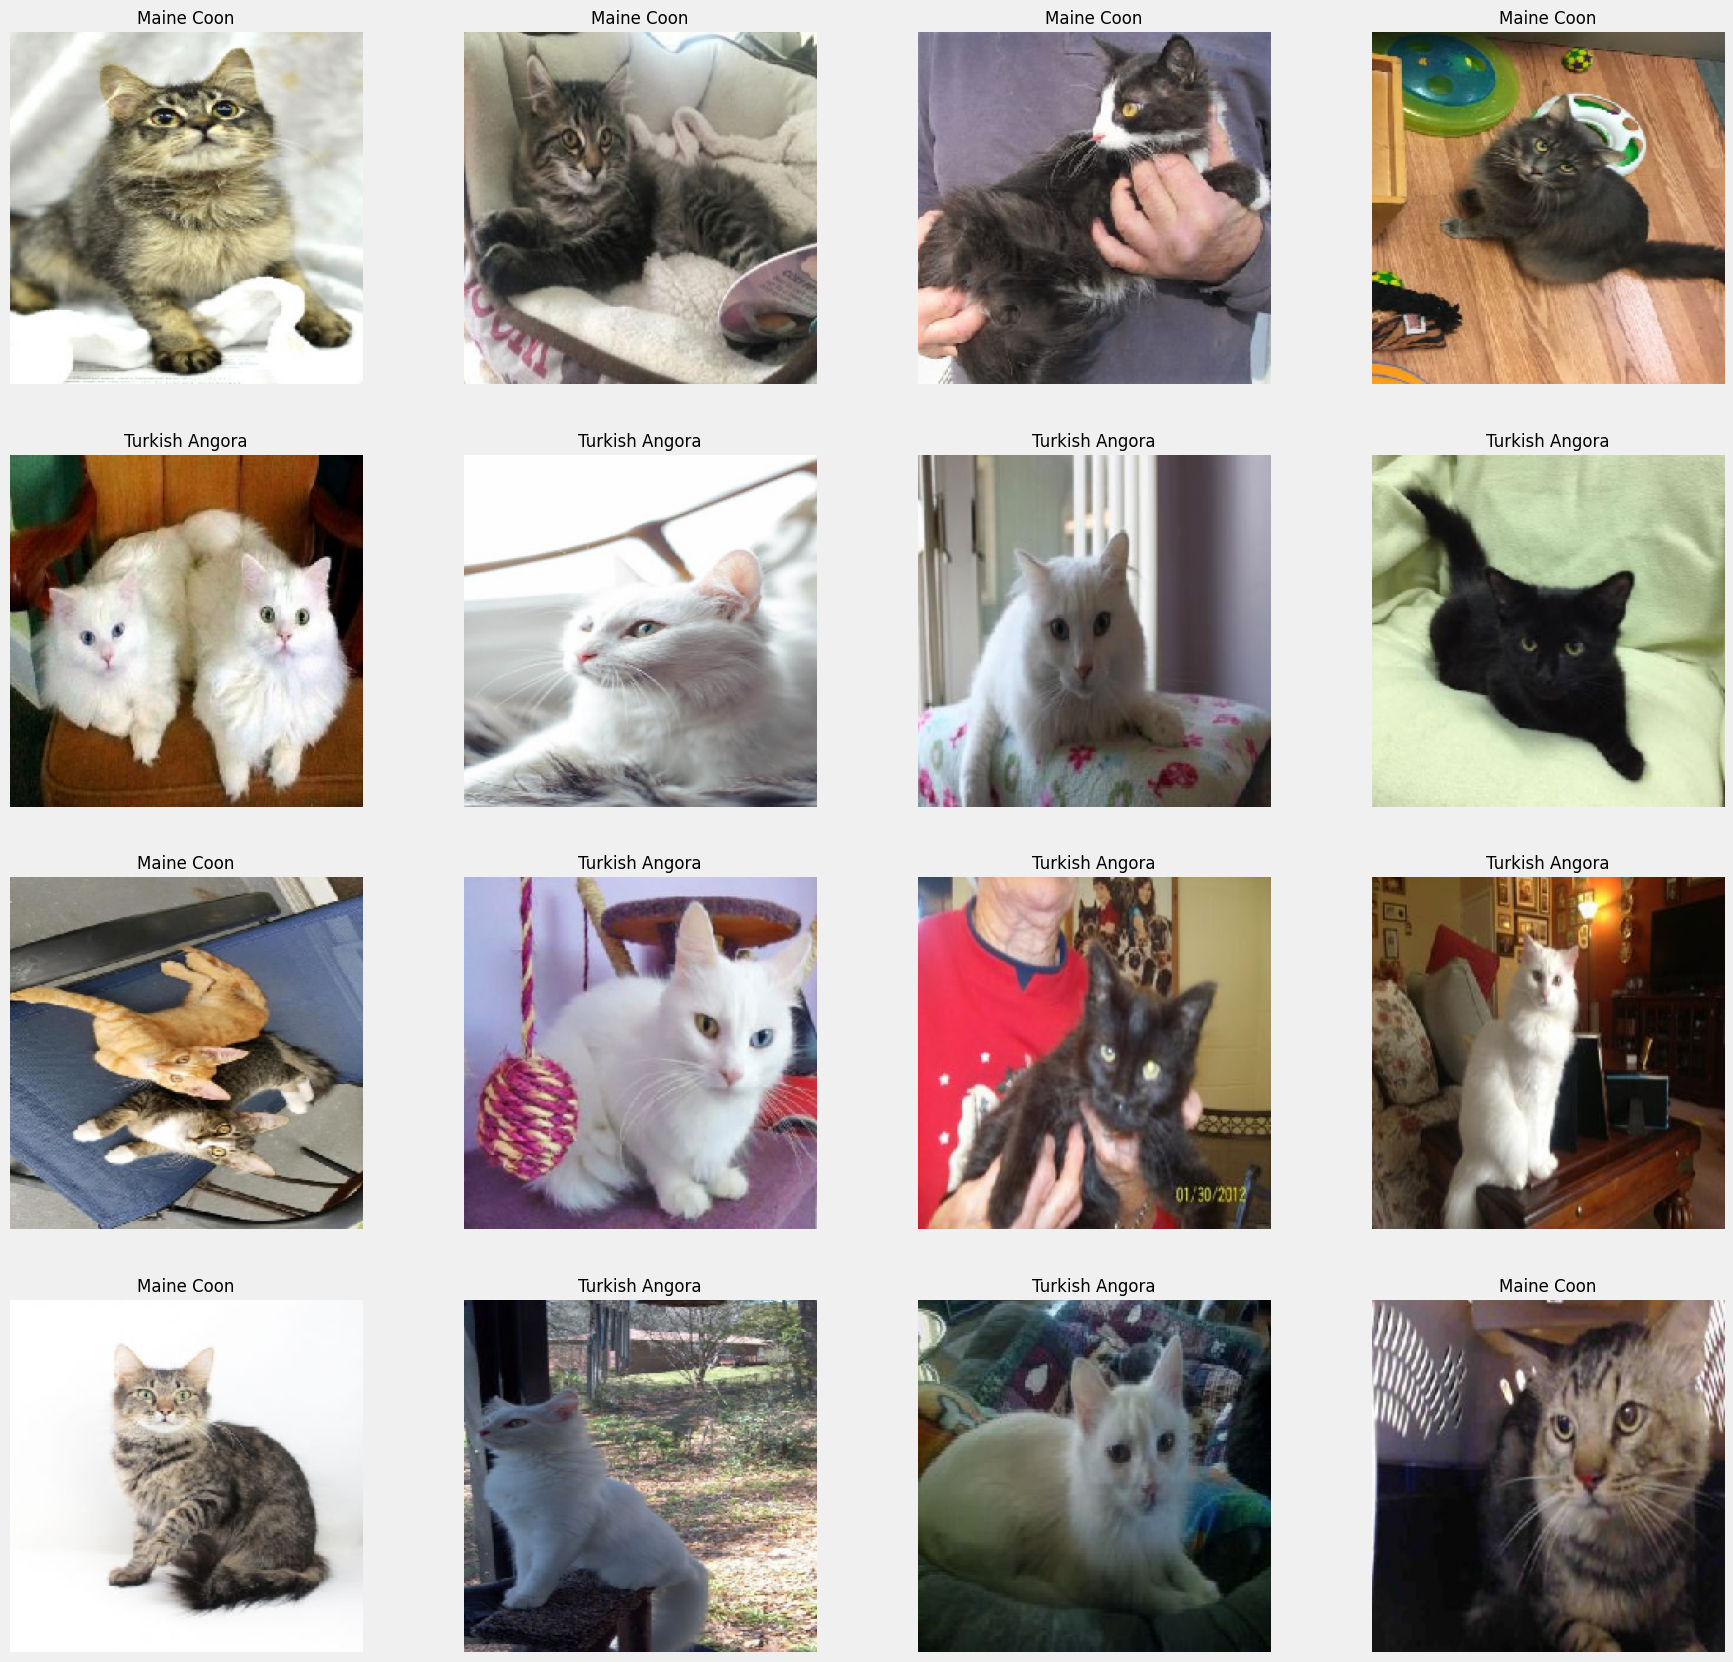

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

g_dict = train_gen.class_indices
classes = list(g_dict.keys())

# Mengambil batch gambar dan label dari generator
images, labels = next(train_gen)

# Menyiapkan tampilan grid untuk menampilkan 16 gambar
plt.figure(figsize=(20, 20))

# Loop untuk menampilkan gambar-gambar
for i in range(16):
    plt.subplot(4, 4, i + 1)  # Menyusun gambar dalam grid 4x4
    image = images[i] /255  # Normalisasi gambar ke rentang [0, 1]
    plt.imshow(image)  # Menampilkan gambar
    index = np.argmax(labels[i])  # Menentukan kelas gambar (label dengan probabilitas tertinggi)
    class_name = classes[index]  # Mendapatkan nama kelas dari indeks
    plt.title(class_name, color='black', fontsize=12)  # Menampilkan nama kelas sebagai judul gambar
    plt.axis('off')  # Menonaktifkan axis

# Menampilkan plot
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=img_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)


history = model.fit(
    train_gen,
    epochs=50,  # Increased epochs for better convergence potential
    validation_data=valid_gen,
    callbacks=[early_stopping] # Added early stopping
)


# Evaluate the model
loss, accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {accuracy}")

Epoch 1/50


c:\personal\Code\S6\Penggalian-Data\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\personal\Code\S6\Penggalian-Data\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 886ms/step - accuracy: 0.6690 - loss: 10.3667 - val_accuracy: 0.5750 - val_loss: 123.6663
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 791ms/step - accuracy: 0.7394 - loss: 12.3785 - val_accuracy: 0.5000 - val_loss: 230.3474
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 747ms/step - accuracy: 0.8441 - loss: 5.7443 - val_accuracy: 0.5083 - val_loss: 63.3034
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 734ms/step - accuracy: 0.9101 - loss: 1.7157 - val_accuracy: 0.5167 - val_loss: 43.4581
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 757ms/step - accuracy: 0.9009 - loss: 2.1030 - val_accuracy: 0.7000 - val_loss: 7.8711
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 752ms/step - accuracy: 0.8895 - loss: 4.2354 - val_accuracy: 0.5750 - val_loss: 21.9754
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 750ms/step - accuracy: 0.9252 - loss: 1.2019 - val_accuracy: 0.5667 - val_loss: 33.2455
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 755ms/step - accuracy: 0.9305 - loss: 1.8130 - val_accuracy: 0.

In [56]:
train_score = model.evaluate(train_gen)
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 1.0000 - loss: 4.5642e-07
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 1.0000 - loss: 4.8659e-07
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7470 - loss: 13.2775
Train Loss:  2.793925375499384e-07
Train Accuracy:  1.0
--------------------
Valid Loss:  3.635826999470737e-07
Valid Accuracy:  1.0
--------------------
Test Loss:  7.596116542816162
Test Accuracy:  0.8374999761581421


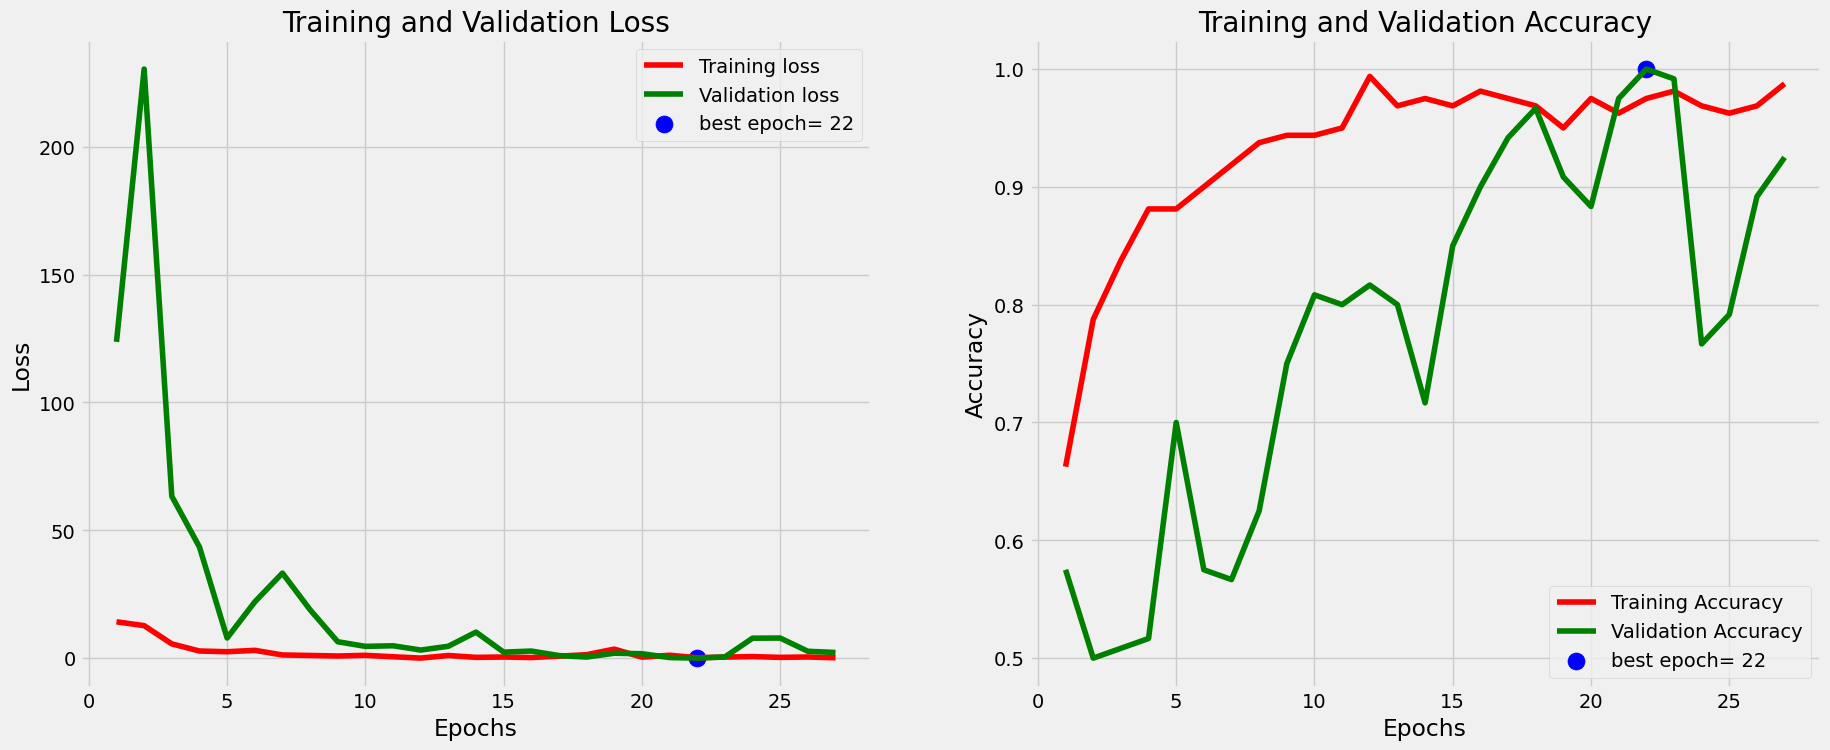

In [40]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [53]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 1.0000 - loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 1.0000 - loss: 2.2500e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6250 - loss: 23.7522
Train Loss:  0.0
Train Accuracy:  1.0
--------------------
Valid Loss:  2.250034867756767e-06
Valid Accuracy:  1.0
--------------------
Test Loss:  23.752174377441406
Test Accuracy:  0.625
